In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from pyclustering.cluster.xmeans import xmeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

In [2]:
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

data_ = data[featuress]
scaler = RobustScaler()
np.random.seed(42)
scaled_features = scaler.fit_transform(data_)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 
kmeans.fit(scaled_features)
initial_centers = kmeans.cluster_centers_

model = xmeans(scaled_features.tolist(), initial_centers=initial_centers.tolist(), kmax=10)
model.process()

clusters = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
provinces = data['Province'].tolist()  

for cluster_idx, cluster in enumerate(clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

Cluster 1: Aceh, Sumatera Barat, Riau, Sumatera Selatan, Lampung, Kalimantan Barat, Kalimantan Selatan, Sulawesi Selatan, Bali, DI Yogyakarta
Cluster 2: Kep. Riau, Jambi, Bengkulu, Kep. Bangka Belitung, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Nusa Tenggara Barat, Nusa Tenggara Timur, Kalimantan Timur, Kalimantan Utara
Cluster 3: Sumatera Utara
Cluster 4: Banten
Cluster 5: Jawa Timur, Jawa Tengah, Jawa Barat, DKI Jakarta


In [3]:
labels = np.zeros(len(scaled_features))

for cluster_idx, cluster in enumerate(clusters):
    for i in cluster:
        labels[i] = cluster_idx  

sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.36600684489894075


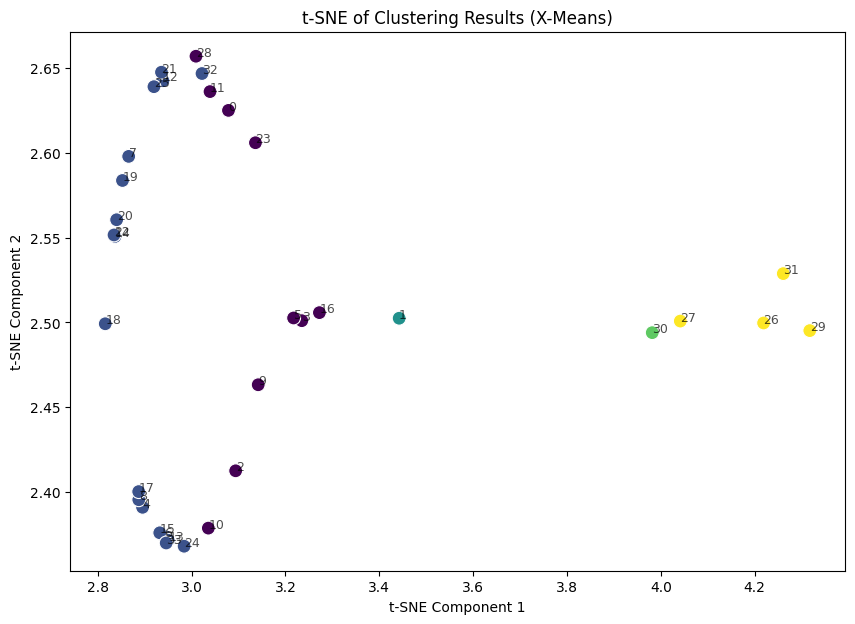

In [4]:
def plot_tsne_with_clusters(X, clusters, provinsi_names):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)  

    df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
    
    cluster_labels = np.zeros(len(X))  
    for cluster_idx, cluster in enumerate(clusters):
        cluster_labels[cluster] = cluster_idx 

    df_tsne['Cluster'] = cluster_labels
    df_tsne['Provinsi'] = provinsi_names

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Cluster', palette='viridis', s=100, legend=None)

    for i in range(len(provinsi_names)):
        plt.text(df_tsne.loc[i, 'tSNE1'], df_tsne.loc[i, 'tSNE2'], str(i), fontsize=9, alpha=0.7)
    
    plt.title('t-SNE of Clustering Results (X-Means)')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

plot_tsne_with_clusters(scaled_features, clusters, data['Province'].tolist())